### Enoncé:
- a1: Expliquer la variable continente en fonction des variables Dis Mag value, nombre total de décès, total affecté et total des dommages.
- b1: Déterminer la qualité du modèle.
- a2: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.
- b2: Déterminer la qualité du modèle.
- a3: Etudier la stationarité des variables:  Dis Mag value,  nombre total de décès,  total affecté et total des dommages.
- b3: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.

### Chargement des bibliothèques nécessaires et des données:

In [7]:
install.packages("readxl")
install.packages("tseries")
install.packages("vars")

library(readxl)
library(tseries)
library(vars)

df <- read_excel("data/exercice2.xlsx", sheet = "Feuil1")
head(df)

Warning message:
"package 'readxl' is in use and will not be installed"


Warning message:
"package 'tseries' is in use and will not be installed"
Warning message:
"package 'vars' is in use and will not be installed"


Continente,Dis_Mag_Value,nombre_total_de_deces,Total_Affecte,Total_des_dommages
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,8,12,40,500000
3,7,476,141277,100000
2,7,3,15,7310
4,7,1250,134250,6000
3,7,31,200,3150
1,8,100,2000,25000


### Modélisation avec la variable <code>Contiente</code>:

In [2]:
# Ajuster le modèle de régression linéaire
modele_a1 <- lm(Continente ~ Dis_Mag_Value + nombre_total_de_deces + Total_Affecte + Total_des_dommages, data=df)

# Résumé du modèle
summary(modele_a1)


Call:
lm(formula = Continente ~ Dis_Mag_Value + nombre_total_de_deces + 
    Total_Affecte + Total_des_dommages, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65610 -0.95289  0.04509  0.69077  3.04716 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.405e+00  6.763e-01   6.513 2.74e-09 ***
Dis_Mag_Value         -3.503e-01  1.010e-01  -3.467 0.000769 ***
nombre_total_de_deces -2.956e-06  4.356e-06  -0.679 0.498939    
Total_Affecte          1.494e-07  1.643e-07   0.909 0.365510    
Total_des_dommages     1.395e-09  4.887e-08   0.029 0.977283    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.033 on 103 degrees of freedom
Multiple R-squared:  0.1161,	Adjusted R-squared:  0.08178 
F-statistic: 3.383 on 4 and 103 DF,  p-value: 0.01212


- <code>Dis_Mag_Value</code> a un impact négatif significatif sur Continente **(p-valeur < 0,001)**.
- (Intercept) est également significatif **(p-valeur < 0,001)**.
- <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code> ne sont pas significatifs **(p-valeurs > 0,05)**.

R-squared: 0.1161106 
Adjusted R-squared: 0.08178476 


(Intercept)         Dis_Mag_Value nombre_total_de_deces 
         4.404865e+00         -3.502955e-01         -2.955936e-06 
        Total_Affecte    Total_des_dommages 
         1.493536e-07          1.395071e-09

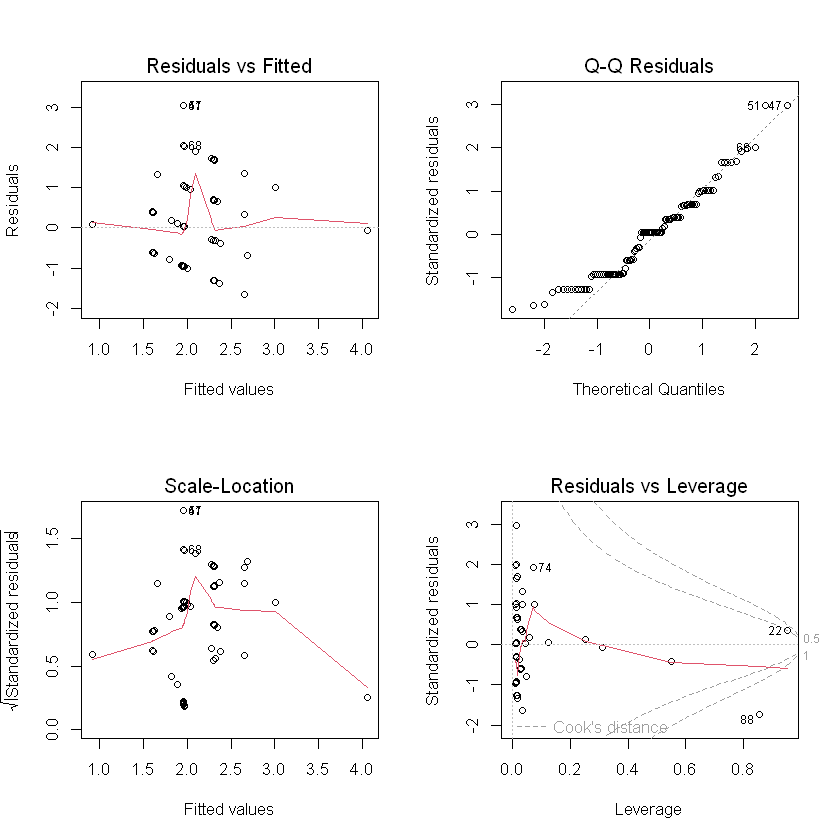

In [3]:
# Afficher les diagnostics du modèle
par(mfrow=c(2,2))
plot(modele_a1)

# Afficher R² et ajusté R²
cat("R-squared:", summary(modele_a1)$r.squared, "\n")
cat("Adjusted R-squared:", summary(modele_a1)$adj.r.squared, "\n")

# Afficher les coefficients du modèle
coefficients(modele_a1)

##### Diagnostic du modèle:

1. **Residuals vs Fitted:** Le graphique montre les résidus par rapport aux valeurs ajustées pour vérifier la linéarité, l'égalité des variances des erreurs, et les valeurs aberrantes. Aucun motif clair dans les résidus, ce qui est bon signe.

2. **Q-Q Plot:** Les quantiles des résidus suivent approximativement une ligne droite, indiquant que les résidus suivent une distribution normale.

3. **Scale-Location:** Ce graphique montre la racine carrée des résidus standardisés par rapport aux valeurs ajustées pour vérifier l'homoscedasticité. La ligne horizontale suggère que l'erreur résiduelle est constante à travers les valeurs ajustées.

4. **Residuals vs Leverage:** Ce graphique identifie les points de données influents. Aucun point particulièrement influent observé qui aurait un effet disproportionné sur le modèle.

##### Qualité du modèle:

Le R² multiple de **0,1161** suggère que le modèle explique environ **11,61%** de la variance de la variable <code>Continente</code>.

Le R² ajusté de **0,08178** indique une correction pour le nombre de prédicteurs dans le modèle.

La statistique F de **3,383** avec une p-valeur de **0,01212** signifie que le modèle est globalement significatif.

>Le modèle indique que <code>Dis_Mag_Value</code> a un impact significatif et négatif sur la variable <code>contiente</code>, tandis que <code>nombre_total_de_deces</code>, <code>Total_Affecte</code> et <code>Total_des_dommages</code> ne semblent pas avoir un impact significatif. La qualité globale du modèle est faible, expliquant environ **11%** de la variance de la variable dépendante. Les diagnostics visuels confirment que les hypothèses de régression sont globalement respectées.

### Modélisation avec la variable <code>Dis_Mag_Value</code>:

In [4]:
modele_a2 <- lm(Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + Total_des_dommages, data=df)

summary(modele_a2)


Call:
lm(formula = Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + 
    Total_des_dommages, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6123 -0.6106  0.3546  0.3909  1.4397 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            6.610e+00  1.034e-01  63.940   <2e-16 ***
nombre_total_de_deces  6.400e-06  4.181e-06   1.531   0.1288    
Total_Affecte          3.935e-07  1.547e-07   2.543   0.0125 *  
Total_des_dommages    -5.823e-08  4.709e-08  -1.237   0.2190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 104 degrees of freedom
Multiple R-squared:  0.097,	Adjusted R-squared:  0.07095 
F-statistic: 3.724 on 3 and 104 DF,  p-value: 0.0137


- (Intercept) a un effet positif significatif **(p-valeur < 0,001)**.
- <code>Total_Affecte</code> a un effet positif significatif **(p-valeur = 0,0125)**.
- <code>nombre_total_de_deces</code> et <code>Total_des_dommages</code> ne sont pas significatifs **(p-valeurs > 0,05)**.

R-squared: 0.09700005 
Adjusted R-squared: 0.07095198 


(Intercept) nombre_total_de_deces         Total_Affecte 
         6.609513e+00          6.400478e-06          3.935219e-07 
   Total_des_dommages 
        -5.823485e-08

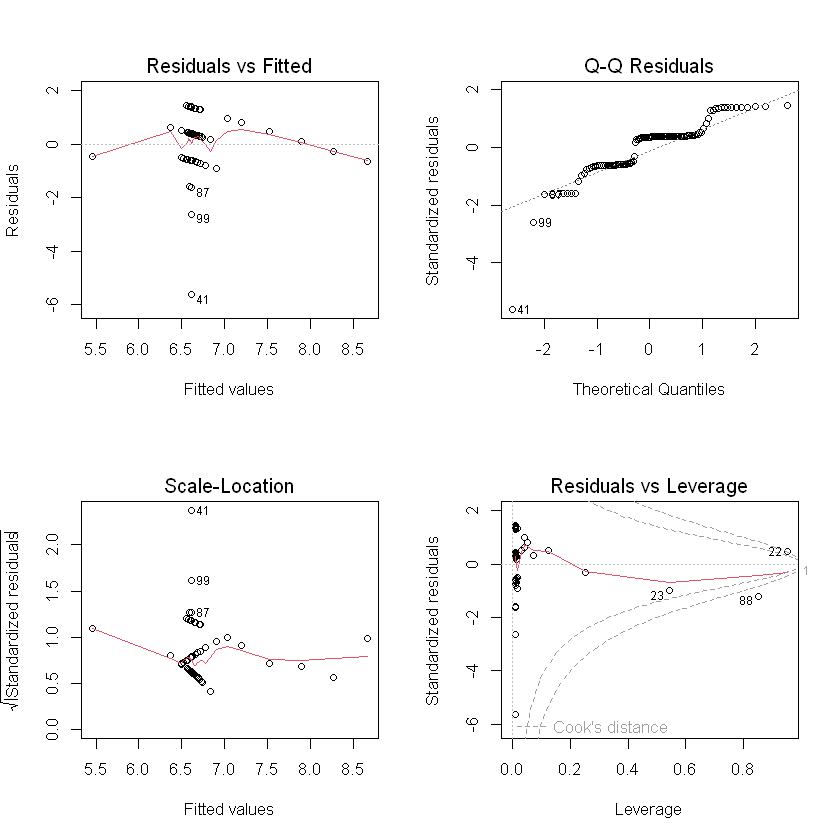

In [5]:
par(mfrow=c(2,2))
plot(modele_a2)

cat("R-squared:", summary(modele_a2)$r.squared, "\n")
cat("Adjusted R-squared:", summary(modele_a2)$adj.r.squared, "\n")

coefficients(modele_a2)

##### Diagnostics visuels:

1. **Residuals vs Fitted:** Ce graphique montre les résidus par rapport aux valeurs ajustées pour vérifier la linéarité, l'hétéroscédasticité et les valeurs aberrantes. Aucun motif clair dans les résidus, ce qui est un bon signe.

2. **Q-Q Plot:** Les quantiles des résidus suivent approximativement une ligne droite, indiquant que les résidus suivent une distribution normale.

3. **Scale-Location:** Ce graphique montre la racine carrée des résidus standardisés par rapport aux valeurs ajustées pour vérifier l'homoscedasticité. La ligne horizontale suggère que l'erreur résiduelle est constante à travers les valeurs ajustées.

4. **Residuals vs Leverage:** Ce graphique identifie les points de données influents. Aucun point particulièrement influent observé qui aurait un effet disproportionné sur le modèle.

##### Qualité du modèle:

- Le R² multiple de 0,097 suggère que le modèle explique environ 9,7% de la variance de la variable <code>Dis_Mag_Value</code>.

- Le R² ajusté de **0,07095** indique une correction pour le nombre de prédicteurs dans le modèle.

- La statistique F de **3,724** avec une p-valeur de **0,0137** signifie que le modèle est globalement significatif.

>Le modèle indique que <code>Total_Affecte</code> a un impact positif significatif sur la variable <code>Dis_Mag_value</code>, tandis que <code>nombre_total_de_deces</code> et <code>Total_des_dommages</code> ne semblent pas avoir un impact significatif. La qualité globale du modèle est faible, expliquant environ **9,70%** de la variance de la variable dépendante. Les diagnostics visuels confirment que les hypothèses de régression sont globalement respectées.

### Étude de la stationarité:
Pour étudier la stationarité des variables, on va utiliser le test de Dickey-Fuller augmenté (ADF):

In [6]:
# Effectuer le test ADF pour chaque variable
adf.test(df$Dis_Mag_Value)
adf.test(df$nombre_total_de_deces)
adf.test(df$Total_Affecte)
adf.test(df$Total_des_dommages)

Warning message in adf.test(df$Dis_Mag_Value):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Dis_Mag_Value
Dickey-Fuller = -4.2359, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$nombre_total_de_deces):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$nombre_total_de_deces
Dickey-Fuller = -4.8164, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_Affecte):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_Affecte
Dickey-Fuller = -4.0487, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_des_dommages):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_des_dommages
Dickey-Fuller = -5.2938, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


>Les résultats des tests de Dickey-Fuller augmentés montrent que toutes les variables (<code>Dis_Mag_Value</code>, <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code>) sont **stationnaires**, car les p-valeurs sont inférieures à **0,05**. Cela signifie que ces séries temporelles n'ont pas de tendance, de saisonnalité, ou de composantes systématiques autres que l'auto-corrélation de l'ordre inférieur.

>En conséquence, nous pouvons procéder à une analyse plus approfondie en utilisant un modèle **VAR**.

In [8]:
# Sélectionner la longueur de lag appropriée
lag_selection <- VARselect(df, lag.max = 10, type = "const")
print(lag_selection)

$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1 

$criteria
                  1            2            3            4            5
AIC(n) 7.596636e+01 7.610007e+01 7.623456e+01 7.648174e+01 7.674301e+01
HQ(n)  7.628643e+01 7.668687e+01 7.708809e+01 7.760199e+01 7.812999e+01
SC(n)  7.675767e+01 7.755082e+01 7.834474e+01 7.925135e+01 8.017205e+01
FPE(n) 9.819799e+32 1.126946e+33 1.302127e+33 1.699217e+33 2.276689e+33
                  6            7            8            9           10
AIC(n) 7.699193e+01 7.723591e+01 7.737594e+01 7.747201e+01 7.756892e+01
HQ(n)  7.864563e+01 7.915634e+01 7.956309e+01 7.992589e+01 8.028953e+01
SC(n)  8.108040e+01 8.198381e+01 8.278327e+01 8.353877e+01 8.429511e+01
FPE(n) 3.061651e+33 4.181450e+33 5.280749e+33 6.590796e+33 8.572216e+33



Tous les critères (AIC, HQ, SC, FPE) suggèrent que le lag optimal pour le modèle VAR est de **1**. Cela signifie que nous devrions utiliser un lag de 1 pour estimer notre modèle VAR, ce qui minimisera les erreurs de prédiction tout en maintenant un modèle parsimonieux.

In [9]:
# Estimer le modèle VAR avec le lag optimal
var_model <- VAR(df, p = lag_selection$selection[1], type = "const")
summary(var_model)


VAR Estimation Results:
Endogenous variables: Continente, Dis_Mag_Value, nombre_total_de_deces, Total_Affecte, Total_des_dommages 
Deterministic variables: const 
Sample size: 107 
Log Likelihood: -4775.82 
Roots of the characteristic polynomial:
0.2005 0.2005 0.111 0.111 0.1021
Call:
VAR(y = df, p = lag_selection$selection[1], type = "const")


Estimation results for equation Continente: 
Continente = Continente.l1 + Dis_Mag_Value.l1 + nombre_total_de_deces.l1 + Total_Affecte.l1 + Total_des_dommages.l1 + const 

                           Estimate Std. Error t value Pr(>|t|)
Continente.l1             4.392e-02  1.041e-01   0.422    0.674
Dis_Mag_Value.l1          1.401e-01  1.123e-01   1.247    0.215
nombre_total_de_deces.l1  4.594e-07  4.594e-06   0.100    0.921
Total_Affecte.l1         -1.807e-08  1.736e-07  -0.104    0.917
Total_des_dommages.l1     8.380e-08  5.142e-08   1.630    0.106
const                     1.013e+00  8.458e-01   1.197    0.234


Residual standard error: 1.086

- Le modèle VAR inclut les variables endogènes Continente, <code>Dis_Mag_Value</code>, <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code> avec une constante. La taille de l'échantillon est de **107 observations**, et le log likelihood est de **-4775.82**. Les racines du polynôme caractéristique sont toutes **inférieures à 1**, ce qui indique que le modèle est stable.

- Pour l'équation Continente, les coefficients des variables à leur premier lag sont présentés avec leurs erreurs standards, valeurs t et p-valeurs. Aucune des variables n'est significative pour prédire Continente à leur lag respectif **(Pr(>|t|) > 0.05)**.


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 295.15, df = 375, p-value = 0.9991



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 295.15, df = 375, p-value = 0.9991



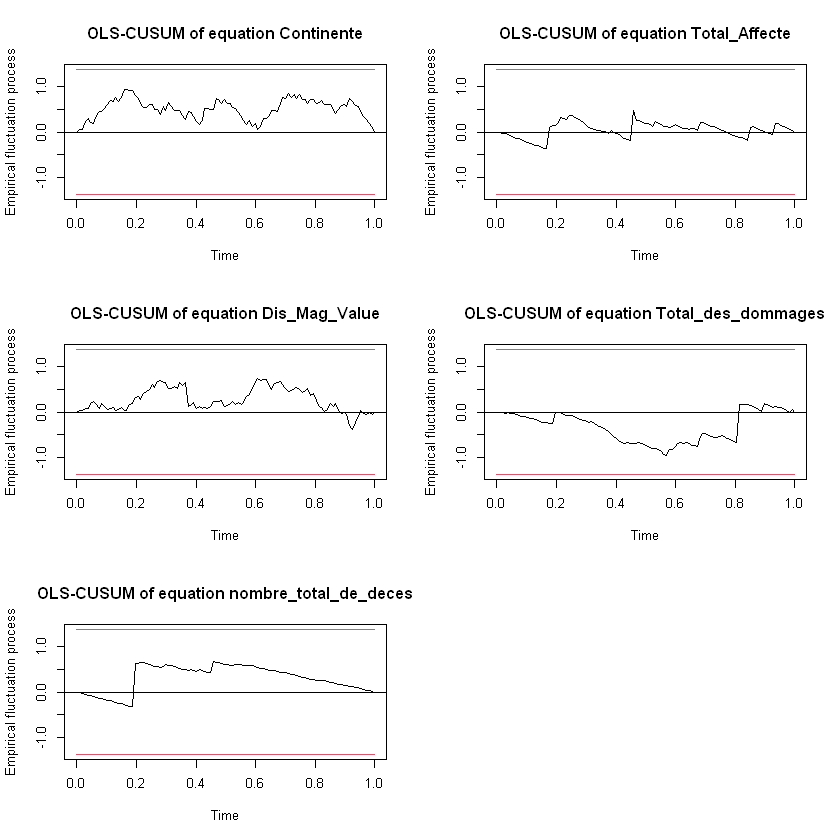

In [10]:
# Test de stabilité
stability_test <- stability(var_model)
plot(stability_test)

# Test des résidus
serial_test <- serial.test(var_model, lags.pt = 16, type = "PT.asymptotic")
print(serial_test)

##### Interprétation:
- La p-valeur de **0.9991** étant très élevée, nous n'avons pas de preuve suffisante pour rejeter l'hypothèse nulle d'absence d'auto-corrélation des résidus. Cela indique que les résidus du modèle VAR ne présentent pas de corrélation en série significative, ce qui est un bon signe pour la validité du modèle.

##### Plots OLS-CUSUM des différentes équations:

- Les graphiques OLS-CUSUM montrent le processus de fluctuation empirique au fil du temps pour les différentes équations (<code>Continente</code>, <code>Total_Affecte</code>, <code>Dis_Mag_Value</code>, <code>Total_des_dommages</code>, et <code>nombre_total_de_deces</code>).

- Les courbes de fluctuation empirique restent généralement stables au fil du temps, ce qui suggère que les coefficients de régression sont stables et que le modèle VAR est globalement stable.

>Les diagnostics du modèle VAR indiquent que le modèle est bien spécifié et stable. Il n'y a pas de preuve d'auto-corrélation significative des résidus, et les coefficients de régression semblent stables au fil du temps.

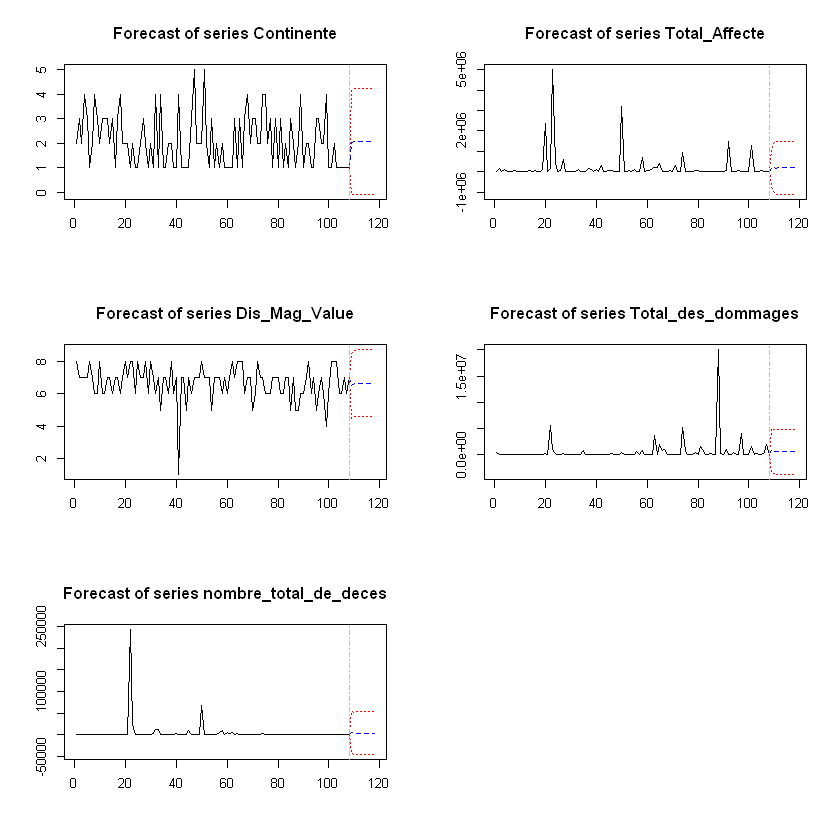

In [11]:
# Prévisions à l'aide du modèle VAR
forecast <- predict(var_model, n.ahead = 10)
plot(forecast)

>Les prévisions du modèle VAR montrent une continuité des tendances observées dans les données historiques. Aucun changement significatif ou fluctuation majeure n'est prévu pour les séries <code>Continente</code>, <code>Total_Affecte</code>, <code>Dis_Mag_Value</code>, <code>Total_des_dommages</code> et <code>nombre_total_de_deces</code>. Le modèle VAR semble bien capturer les dynamiques des données historiques et fournir des prévisions stables pour les prochaines périodes.